In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data= pd.read_csv("C:\\Users\\USER\\Documents\\Python Scripts\\Datasets\\elections.csv")
data.head(2)

,fec_candidate_id,name,party,status,address_one,address_two,city,state,zip,fec_committee_id,cycle,cand_status,office_state,district,branch,clean_name,url,crp_id,google_entity_id
0,H8AK00140,"GALVIN, ALYSE",IND,C,P.O. BOX 90020,NaN,ANCHORAGE,AK,99509.0,C00665711,2018,C,AK,0,H,Alyse Galvin,https://www.alyse4alaska.com/,NaN,NaN
1,H6AK00045,"YOUNG, DONALD E",REP,I,2504 FAIR BANKS ST,NaN,ANCHORAGE,AK,99503.0,C00012229,2018,C,AK,0,H,Don Young,http://alaskansfordonyoung.com/,N00007999,/m/024p1k


In [4]:
data.shape

(1230, 19)

In [8]:
data.url.isna().agg(['sum', "count", 'mean'])

sum       259.000000
count    1230.000000
mean        0.210569
Name: url, dtype: float64

In [21]:
data_summary = (data['party'].value_counts().to_frame().
                assign(perc=data['party'].value_counts(normalize = True))
               .assign(cumperc = lambda x: x['perc'].cumsum()))
data_summary         

,party,perc,cumperc
DEM,527,0.428455,0.428455
REP,467,0.379675,0.808130
LIB,82,0.066667,0.874797
IND,57,0.046341,0.921138
GRE,22,0.017886,0.939024
NNE,9,0.007317,0.946341
UNK,9,0.007317,0.953659
OTH,7,0.005691,0.959350
NPA,6,0.004878,0.964228
REF,6,0.004878,0.969106


In [23]:
data_summary.head(10).style.format({'perc': '{:.1%}', 'cumperc': '{:.1%}'})


,party,perc,cumperc
DEM,527,42.8%,42.8%
REP,467,38.0%,80.8%
LIB,82,6.7%,87.5%
IND,57,4.6%,92.1%
GRE,22,1.8%,93.9%
NNE,9,0.7%,94.6%
UNK,9,0.7%,95.4%
OTH,7,0.6%,95.9%
NPA,6,0.5%,96.4%
REF,6,0.5%,96.9%


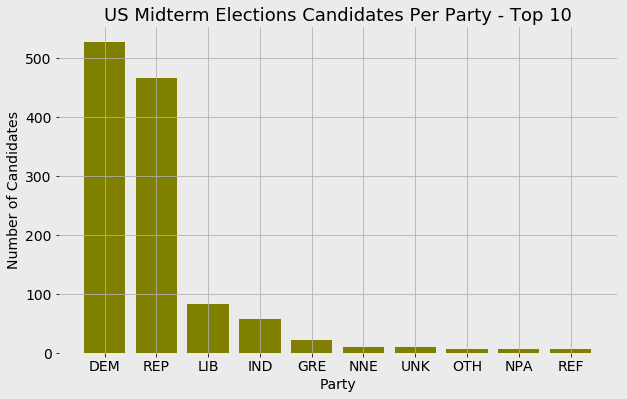

In [51]:
## Party with number of candidates
fig, ax = plt.subplots(facecolor='#ebebeb')  # light bg for graph
fig.set_size_inches(10, 6)
ax.bar(data_summary.index[:10], data_summary['party'][:10], color='olive')
ax.set_frame_on(False) # changes the inside color of the graph
ax.grid()
ax.set_title('US Midterm Elections Candidates Per Party - Top 10', fontsize=18)
ax.tick_params(labelsize=14)
ax.set_xlabel('Party', fontsize=14)
ax.set_ylabel('Number of Candidates', fontsize=14)
plt.show()

In [58]:
data_summary_state = (data['state']
                      .value_counts().to_frame()
                      .assign(perc=data['state'].value_counts(normalize=True))
                      .assign(cum_perc=lambda df: df['perc'].cumsum()))
                     
data_summary_state.head(10).style.format({'perc': '{:.2%}', 'cum_perc': '{:.1%}'})v


,state,perc,cum_perc
CA,116,9.45%,9.4%
TX,93,7.57%,17.0%
NY,73,5.94%,23.0%
FL,63,5.13%,28.1%
OH,44,3.58%,31.7%
PA,43,3.50%,35.2%
IL,41,3.34%,38.5%
TN,38,3.09%,41.6%
MO,36,2.93%,44.5%
MI,35,2.85%,47.4%


In [88]:
data_summary_state.values()

TypeError: 'numpy.ndarray' object is not callable

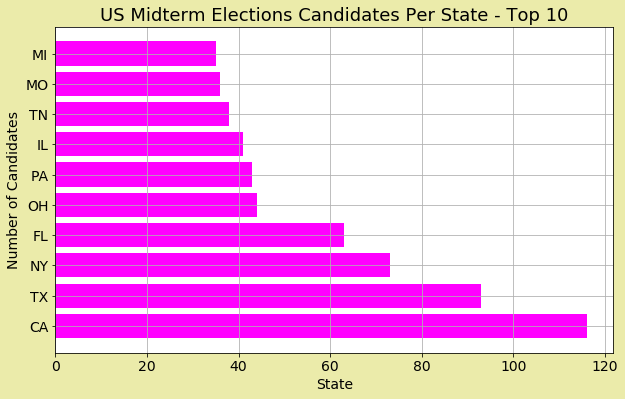

In [74]:
fig, ax = plt.subplots(facecolor='#ebebaa')
fig.set_size_inches(10, 6)
ax.barh(data_summary_state.index[:10], 
       data_summary_state['state'][:10], color='magenta')
#ax.set_frame_on(False)
ax.grid()
ax.set_title('US Midterm Elections Candidates Per State - Top 10', fontsize=18)
ax.tick_params(labelsize=14)
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Number of Candidates', fontsize=14)
plt.show()

In [5]:
serp_cand = pd.read_csv("C:\\Users\\USER\\Documents\\Python Scripts\\Datasets\\serp_candidates.csv")
serp_cand.head(1)

,searchTerms,rank,title,snippet,displayLink,link,queryTime,totalResults,cacheId,formattedUrl,...,inputEncoding,outputEncoding,safe,cx,gl,searchTime,formattedSearchTime,formattedTotalResults,fileFormat,mime
0,Alyse Galvin,1.0,Alyse Galvin for Congress,My name is Alyse Galvin and I'm an Independent...,www.alyse4alaska.com,https://www.alyse4alaska.com/,2018-10-21 01:47:08.701798+00:00,28100,LrPZYXgtDvYJ,https://www.alyse4alaska.com/,...,utf8,utf8,off,012859022920491477448:pubdbfjmmec,us,0.13984,0.14,"28,100",NaN,NaN


In [6]:
top_domains = (serp_cand
               .displayLink.str.replace('.*(house.gov)', 'house.gov')
               .value_counts())
top_domains
top_domains.to_frame()[:25]

,displayLink
twitter.com,932
www.facebook.com,922
ballotpedia.org,889
en.wikipedia.org,776
house.gov,463
votesmart.org,369
www.youtube.com,240
www.linkedin.com,199
www.opensecrets.org,191
www.washingtonpost.com,187


In [7]:
top_domains.values[:15]

array([932, 922, 889, 776, 463, 369, 240, 199, 191, 187, 157, 155, 150,
        89,  77], dtype=int64)

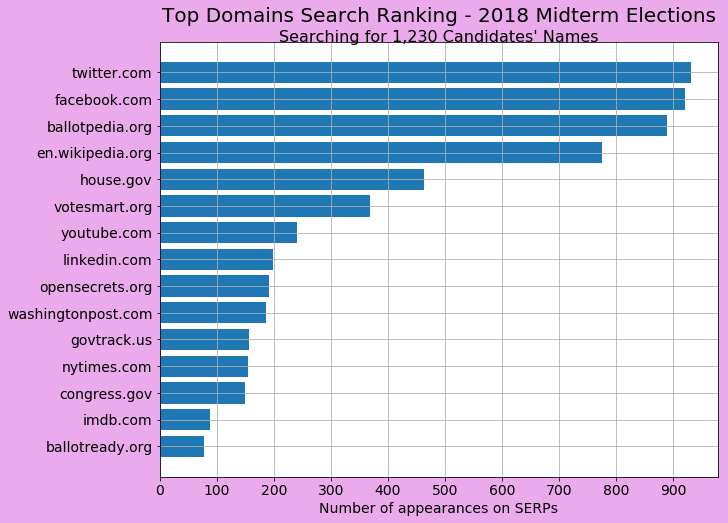

In [12]:
fig, ax = plt.subplots(facecolor='#ebaaeb')
fig.set_size_inches(10,8)
ax.set_frame_on(True)
ax.barh(top_domains.index.str.replace('www.', '')[:15], top_domains.values[:15])
ax.invert_yaxis()
ax.grid()
ax.tick_params(labelsize=14)
ax.set_xticks(range(0, 1000, 100))
ax.set_title('Top Domains Search Ranking - 2018 Midterm Elections', pad=20, fontsize=20)

ax.text(0.5, 1, 'Searching for 1,230 Candidates\' Names', fontsize=16,
    transform=ax.transAxes, ha='center')
ax.set_xlabel('Number of appearances on SERPs', fontsize=14)
plt.show()